In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [2]:
import os

In [3]:
os.chdir("F:\\DataScience\\DataSets\\")

In [4]:
dataset=pd.read_csv("AirPassengers.csv")

In [5]:
dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
dataset['Month']=pd.to_datetime(dataset['Month'],infer_datetime_format=True)

In [7]:
dataset.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [8]:
indexesDatasets=dataset.set_index(['Month'])

In [9]:
indexesDatasets.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


F:\Anaconda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


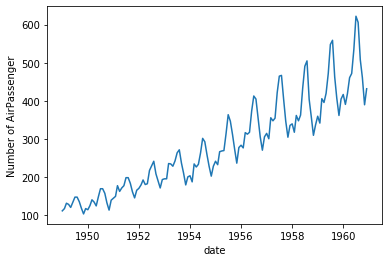

In [10]:
plt.xlabel("date")
plt.ylabel("Number of AirPassenger")
plt.plot(indexesDatasets)

In [11]:
#Determining rolling statistics
rolmean=indexesDatasets.rolling(window=12).mean()

In [12]:
rolstd=indexesDatasets.rolling(window=12).std()

In [13]:
print(rolmean)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
1950-04-01   128.833333
1950-05-01   129.166667
1950-06-01   130.333333
1950-07-01   132.166667
1950-08-01   134.000000
1950-09-01   135.833333
1950-10-01   137.000000
1950-11-01   137.833333
1950-12-01   139.666667
1951-01-01   142.166667
1951-02-01   144.166667
1951-03-01   147.250000
1951-04-01   149.583333
1951-05-01   153.500000
1951-06-01   155.916667
...                 ...
1958-07-01   376.333333
1958-08-01   379.500000
1958-09-01   379.500000
1958-10-01   380.500000
1958-11-01   380.916667
1958-12-01   381.000000
1959-01-01   382.666667
1959-02-01   384.666667
1959-03-01   388

In [14]:
print(rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01    13.720147
1950-01-01    13.453342
1950-02-01    13.166475
1950-03-01    13.686977
1950-04-01    13.822467
1950-05-01    13.663710
1950-06-01    14.760718
1950-07-01    18.135016
1950-08-01    20.797727
1950-09-01    21.928949
1950-10-01    21.315807
1950-11-01    20.067311
1950-12-01    19.070841
1951-01-01    17.439940
1951-02-01    16.781122
1951-03-01    19.349066
1951-04-01    19.425655
1951-05-01    18.744696
1951-06-01    19.942911
...                 ...
1958-07-01    59.590013
1958-08-01    65.557054
1958-09-01    65.557054
1958-10-01    65.106207
1958-11-01    64.593074
1958-12-01    64.530472
1959-01-01    63.627229
1959-02-01    61.759553
1959-03-01    61

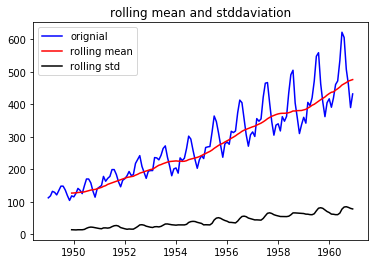

In [15]:
#plot rolling statistics
plt.plot(indexesDatasets,color='blue',label='orignial')
plt.plot(rolmean,color='red',label='rolling mean')
plt.plot(rolstd,color='black',label='rolling std')
plt.legend(loc='best')
plt.title('rolling mean and stddaviation')
plt.show(block=False)

In [16]:
#perform dickey-fuller test
from statsmodels.tsa.stattools import adfuller

In [17]:
print("result of dickey fuller test")
dftest=adfuller(indexesDatasets['#Passengers'],autolag='AIC')


result of dickey fuller test


In [18]:
dftest

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [19]:
dfoutput=pd.Series(dftest[0:4],index=['test-statistics','p-value','#lags used','number of observation used'])

In [20]:
dfoutput

test-statistics                 0.815369
p-value                         0.991880
#lags used                     13.000000
number of observation used    130.000000
dtype: float64

In [21]:
for key,value in dftest[4].items():
    dfoutput[key]=value
    
    

In [22]:
dfoutput

test-statistics                 0.815369
p-value                         0.991880
#lags used                     13.000000
number of observation used    130.000000
1%                             -3.481682
5%                             -2.884042
10%                            -2.578770
dtype: float64

In [23]:
#Estimate the trend 
indexdataset_logscale=np.log(indexesDatasets)

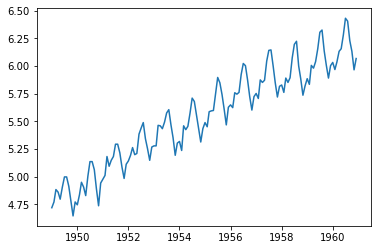

In [24]:
plt.plot(indexdataset_logscale)

In [25]:
#moving average
movingavg=indexdataset_logscale.rolling(window=12).mean()
movingstd=indexdataset_logscale.rolling(window=12).std()

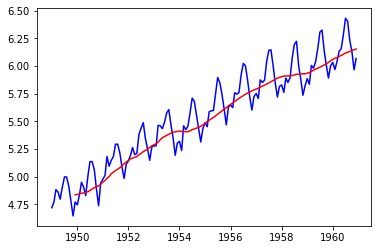

In [26]:
plt.plot(indexdataset_logscale,color='blue')
plt.plot(movingavg,color='red')
# plt.plot(movingstd,color='green')

In [27]:
datasetlogscaled_minus_movingavg=indexdataset_logscale-movingavg

In [28]:
datasetlogscaled_minus_movingavg

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [29]:
datasetlogscaled_minus_movingavg.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [30]:
datasetlogscaled_minus_movingavg.dropna(inplace=True)

In [31]:
datasetlogscaled_minus_movingavg.head(12)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [32]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    movingavg=timeseries.rolling(window=12).mean()
    movingstd=timeseries.rolling(window=12).std()
#     print(rolemean)
#     print(rolestd)
    
    #plot roling statistics
    plt.plot(timeseries,color='blue',label='orignial')
    plt.plot(movingavg,color='red',label='rolling mean')
    plt.plot(movingstd,color='black',label='rolling std')
    plt.legend(loc='best')
    plt.title('rolling mean and stddaviation')
    plt.show(block=False)
    
    #perform dickeyfullar test
    dftest=adfuller(timeseries['#Passengers'],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['test statistic','p-value','#lags used','number of obervation'])
    for key,value in dftest[4].items():
        dfoutput[key]=value
    
    print(dfoutput)    
    

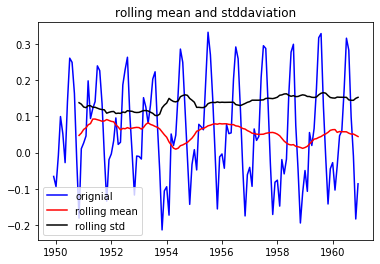

test statistic           -3.162908
p-value                   0.022235
#lags used               13.000000
number of obervation    119.000000
1%                       -3.486535
5%                       -2.886151
10%                      -2.579896
dtype: float64


In [33]:
test_stationary(datasetlogscaled_minus_movingavg)

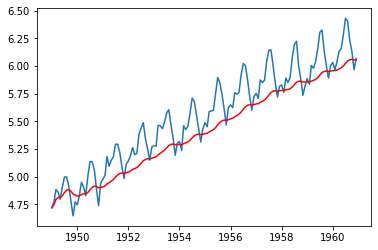

In [34]:
EWMA=indexdataset_logscale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexdataset_logscale)
plt.plot(EWMA,color='red')

In [35]:
datasetlogscale_minius_EWMA=indexdataset_logscale-EWMA

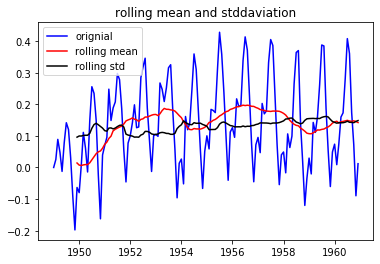

test statistic           -3.601262
p-value                   0.005737
#lags used               13.000000
number of obervation    130.000000
1%                       -3.481682
5%                       -2.884042
10%                      -2.578770
dtype: float64


In [36]:
test_stationary(datasetlogscale_minius_EWMA)

In [74]:
datasetlogDIFFshift=indexdataset_logscale-indexdataset_logscale.shift()

In [75]:
print(datasetlogDIFFshift)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01     0.052186
1949-03-01     0.112117
1949-04-01    -0.022990
1949-05-01    -0.064022
1949-06-01     0.109484
1949-07-01     0.091937
1949-08-01     0.000000
1949-09-01    -0.084557
1949-10-01    -0.133531
1949-11-01    -0.134733
1949-12-01     0.126294
1950-01-01    -0.025752
1950-02-01     0.091350
1950-03-01     0.112478
1950-04-01    -0.043485
1950-05-01    -0.076961
1950-06-01     0.175633
1950-07-01     0.131852
1950-08-01     0.000000
1950-09-01    -0.073203
1950-10-01    -0.172246
1950-11-01    -0.154151
1950-12-01     0.205444
1951-01-01     0.035091
1951-02-01     0.033902
1951-03-01     0.171148
1951-04-01    -0.088033
1951-05-01     0.053744
1951-06-01     0.034289
...                 ...
1958-07-01     0.121098
1958-08-01     0.028114
1958-09-01    -0.223144
1958-10-01    -0.118092
1958-11-01    -0.146750
1958-12-01     0.083511
1959-01-01     0.066021
1959-02-01    -0.051293
1959-03-01     0

In [76]:
datasetlogDIFFshift.dropna(inplace=True)

In [77]:
datasetlogDIFFshift

,#Passengers
Month,
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022
1949-06-01,0.109484
1949-07-01,0.091937
1949-08-01,0.000000
1949-09-01,-0.084557
1949-10-01,-0.133531


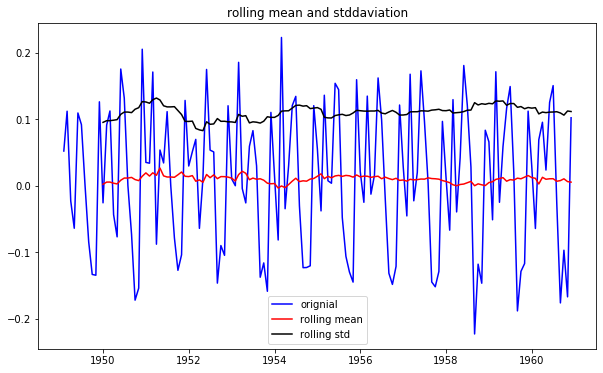

test statistic           -2.717131
p-value                   0.071121
#lags used               14.000000
number of obervation    128.000000
1%                       -3.482501
5%                       -2.884398
10%                      -2.578960
dtype: float64


In [78]:
test_stationary(datasetlogDIFFshift)

In [79]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [82]:
decomposition=seasonal_decompose(indexdataset_logscale)
treand=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

In [83]:
treand

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,4.837280
1949-08-01,4.841114
1949-09-01,4.846596


In [84]:
seasonal

,#Passengers
Month,
1949-01-01,-0.085815
1949-02-01,-0.114413
1949-03-01,0.018113
1949-04-01,-0.013046
1949-05-01,-0.008966
1949-06-01,0.115393
1949-07-01,0.210816
1949-08-01,0.204512
1949-09-01,0.064836


In [85]:
residual

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,-0.050884
1949-08-01,-0.048415
1949-09-01,0.001223


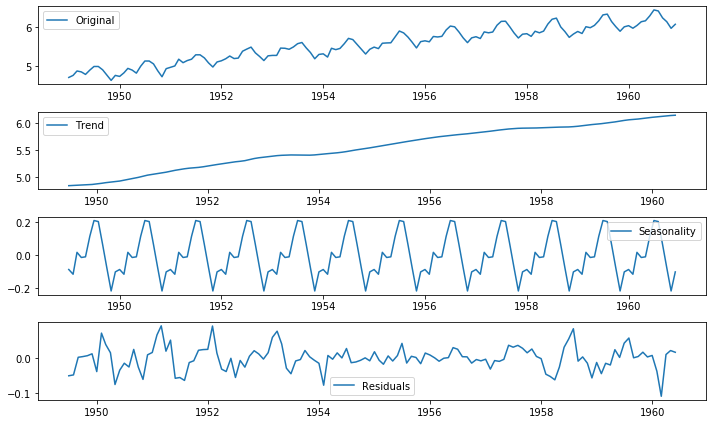

In [88]:
plt.subplot(411)
plt.plot(indexdataset_logscale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(treand, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


In [89]:
decomposedlogdata=residual

In [91]:
decomposedlogdata.dropna(inplace=True)

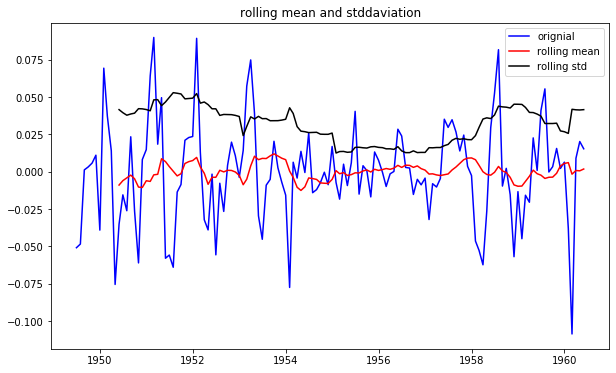

test statistic         -6.332387e+00
p-value                 2.885059e-08
#lags used              9.000000e+00
number of obervation    1.220000e+02
1%                     -3.485122e+00
5%                     -2.885538e+00
10%                    -2.579569e+00
dtype: float64


In [92]:
test_stationary(decomposedlogdata)

In [95]:
from statsmodels.tsa.stattools import acf,pacf

In [98]:
lag_acf=acf(datasetlogDIFFshift,nlags=20)#for q value
lag_pacf=pacf(datasetlogDIFFshift,nlags=20,method='ols')#for p value

F:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'autocorrelation function')

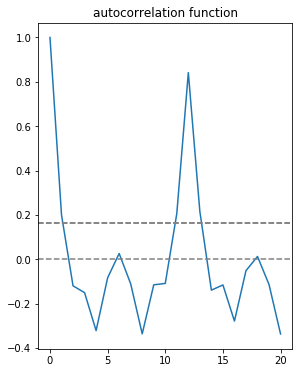

In [100]:
#plot acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogDIFFshift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogDIFFshift)),linestyle='--',color='gray')
plt.title('autocorrelation function')

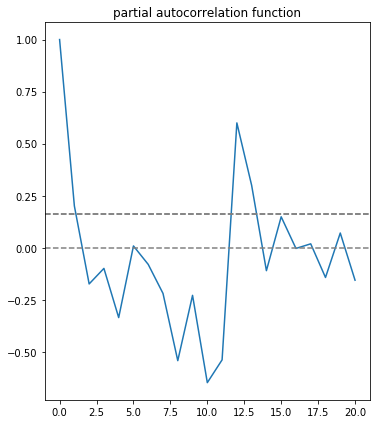

In [101]:
#plot pacf
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogDIFFshift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogDIFFshift)),linestyle='--',color='gray')
plt.title('partial autocorrelation function')
plt.tight_layout()

In [102]:
lag_acf

array([ 1.        ,  0.19975134, -0.12010433, -0.15077204, -0.32207432,
       -0.08397453,  0.02577843, -0.11096075, -0.33672146, -0.11558631,
       -0.10926704,  0.20585223,  0.84142998,  0.21508704, -0.13955394,
       -0.11599576, -0.27894284, -0.05170646,  0.01245814, -0.1143576 ,
       -0.33717439])

In [103]:
lag_pacf

array([ 1.        ,  0.20081508, -0.17368194, -0.09901213, -0.33527437,
        0.00872185, -0.07990745, -0.21923579, -0.5421352 , -0.22848913,
       -0.64775301, -0.53828661,  0.59971786,  0.29995642, -0.10992268,
        0.14878637, -0.00321881,  0.01892684, -0.14268478,  0.07089814,
       -0.15566902])

F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

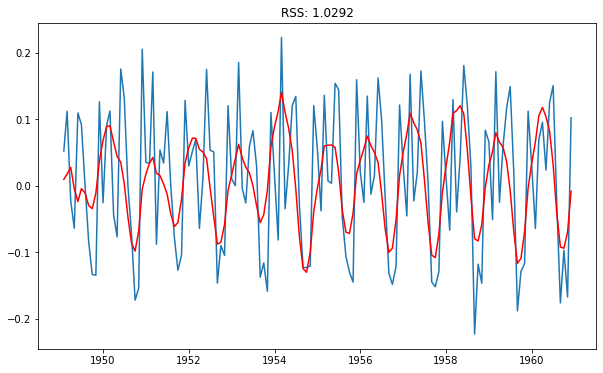

In [104]:
from statsmodels.tsa.arima_model import ARIMA
#AR MODEL
model=ARIMA(indexdataset_logscale,order=(2,1,2))
result_ar=model.fit(disp=-1)
plt.plot(datasetlogDIFFshift)
plt.plot(result_ar.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((result_ar.fittedvalues-datasetlogDIFFshift['#Passengers'])**2))


F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.4721')

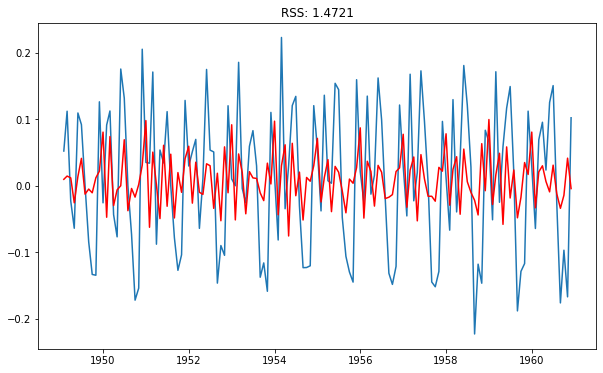

In [109]:
#ma
model=ARIMA(indexdataset_logscale,order=(0,1,2))
result_ma=model.fit(disp=-1)
plt.plot(datasetlogDIFFshift)
plt.plot(result_ma.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((result_ma.fittedvalues-datasetlogDIFFshift['#Passengers'])**2))


F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

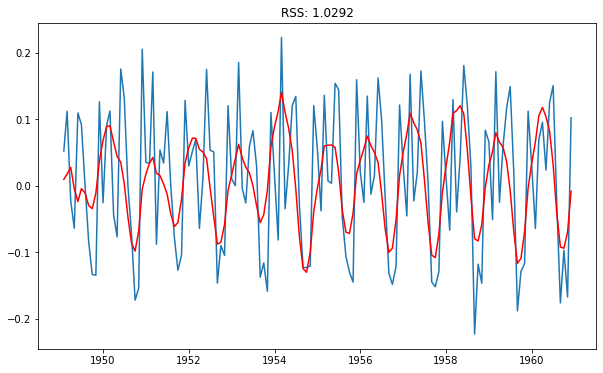

In [110]:
model=ARIMA(indexdataset_logscale,order=(2,1,2))
result_ARIMA=model.fit(disp=-1)
plt.plot(datasetlogDIFFshift)
plt.plot(result_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((result_ARIMA.fittedvalues-datasetlogDIFFshift['#Passengers'])**2))


In [111]:
prediction_ARIMA_diff=pd.Series(result_ARIMA.fittedvalues,copy=True)
print(prediction_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [113]:
#convert to commulativesum
prediction_ARIMA_diff_cumsum=prediction_ARIMA_diff.cumsum()
print(prediction_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [115]:
prediction_ARIMA_log=pd.Series(indexdataset_logscale['#Passengers'].ix[0],index=indexdataset_logscale.index)
prediction_ARIMA_log=prediction_ARIMA_log.add(prediction_ARIMA_diff_cumsum,fill_value=0)
prediction_ARIMA_log.head()

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

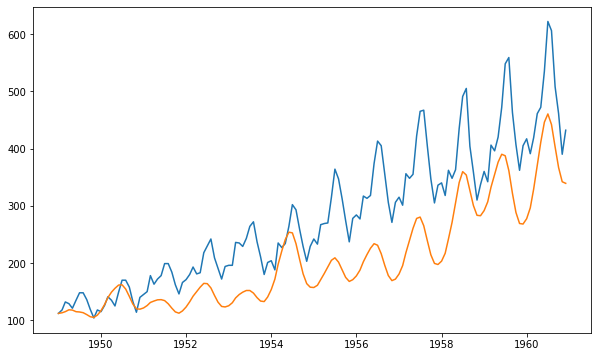

In [117]:
prediction_ARIMA=np.exp(prediction_ARIMA_log)
plt.plot(indexesDatasets)
plt.plot(prediction_ARIMA)

In [42]:
 result_ARIMA.plot_predict(1,264)
#result_ARIMA.forecast(steps=120)

NameError: name 'result_ARIMA' is not defined